## Step3 Data Analysis and Visualization

In [1]:
##Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
## Getting Data Ready
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.measurements
station = Base.classes.stations

In [9]:
session = Session(engine)

## Precipitation Analysis

In [15]:
##Precipitation Analysis

##2016,8,23##2017,8,24##Most recent 12 months##
Pcp= engine.execute('SELECT * FROM measurements where Date between"2016-08-23" and "2017-08-24" order by Date').fetchall()

In [22]:
Pcp2=pd.DataFrame(Pcp)

In [25]:
Pcp3=Pcp2[[2,3]]
Pcp3.columns=(['Date','Prcp'])
Pcp3.set_index('Date',inplace=True)

In [34]:
Pcp3.head()

,Prcp
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


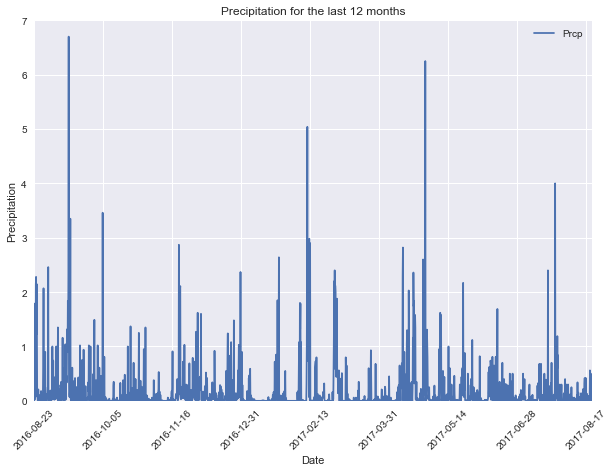

In [38]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,7))
Pcp3.plot(ax=ax)


ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_ylim(0,max(Pcp3['Prcp']+.3))
ax.set_title("Precipitation for the last 12 months")
ax.set_ylabel("Precipitation")
ax.set_xlabel("Date")
plt.xticks(rotation=45)
#plt.savefig("Last_12mon_prcp.png")
plt.show()

In [39]:
Pcp3.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Stations Analysis

In [77]:
##Statii
active = session.query(measurements.station, func.count(measurements.station)).\
    group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()

most_active= pd.DataFrame(active, columns=['station', 'count'])

most_active

,station,count
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [86]:
MA_station = most_active["station"][0]

Temp = session.query(measurements.tobs).\
    filter(measurements.date > '2016-08-23').filter(measurements.date < '2017-08-24').\
    filter(measurements.station == MA_station).statement

Temp_data = pd.read_sql_query(Temp, session.bind)
Temp_data.head()

,tobs
0,77
1,80
2,80
3,75
4,73


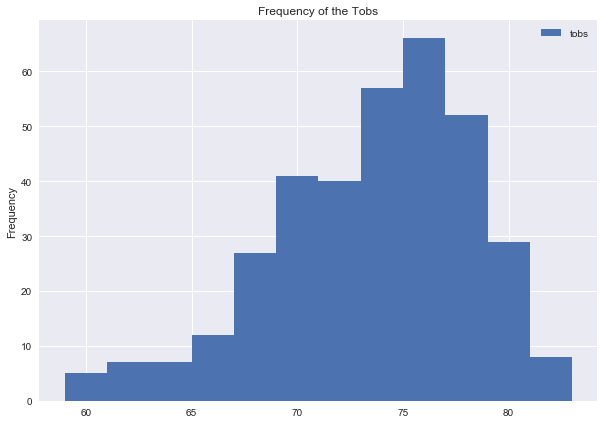

In [90]:
## Plot the results as a histogram with bins=12.
sns.set_style(style="darkgrid")
ax = Temp_data.plot(kind="hist",bins=12,figsize=(10,7))

ax.set_title("Frequency of the Tobs")
ax.set_ylabel("Frequency")
#plt.savefig("Frequency_of_tobs.png")
plt.show()

## Temperature Analysis

In [94]:
Start='2016-02-01'
End='2016-02-15'

temp = session.query(func.avg(measurements.tobs),func.max(measurements.tobs),func.min(measurements.tobs)).\
    filter(measurements.date > Start).filter(measurements.date < End).statement
#write into a dataframe
Temp_detail = pd.read_sql_query(temp, session.bind)
Temp_detail

,avg_1,max_1,min_1
0,68.932432,79,56


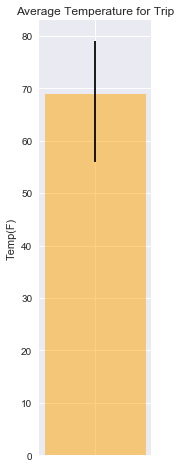

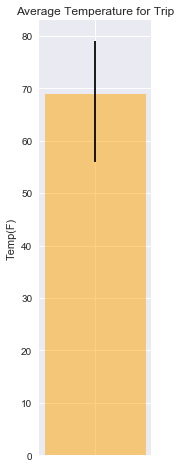

In [100]:
Temp_avg=Temp_detail['avg_1']
Temp_max=Temp_detail['max_1']
Temp_min=Temp_detail['min_1']

x=np.arange(1,2)
sns.set_style(style="darkgrid")
width=0.1
plt.figure(figsize=(2,8))
plt.bar(x,Temp_avg,width,linewidth=10,alpha=0.5,tick_label="",color="orange",yerr=(Temp_avg-Temp_min, Temp_max-Temp_avg))

plt.title("Average Temperature for Trip")
plt.ylabel("Temp(F)")
#plt.savefig("Average Temp for Trip")
plt.show()